In [2]:
#importing main data analysis libraries  
import pandas as pd 
import numpy as np
#importing main visualization libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline 

#set visualization settings
large = 30; med = 14; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (13, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

In [37]:
train = pd.read_csv('C:/Users/user/Projects/Health_Insurance_Sell_Analysis/data/train.csv')

# Plan

-  Drop features
    -  id
- Remove outliers: annual pricing
- Encoding features:
    - Gender
    - Vehicle_Age
    - Vehicle_Damage
- Feature scaling

## Dropping features

In [38]:
for column in train.columns:
    column_lower = column.lower()
    train = train.rename(columns = {column:column_lower})

In [39]:
train = train.drop(columns= ['id', 'region_code'], axis = 1)

In [40]:
train.columns

Index(['gender', 'age', 'driving_license', 'previously_insured', 'vehicle_age',
       'vehicle_damage', 'annual_premium', 'policy_sales_channel', 'vintage',
       'response'],
      dtype='object')

## Remove outliers

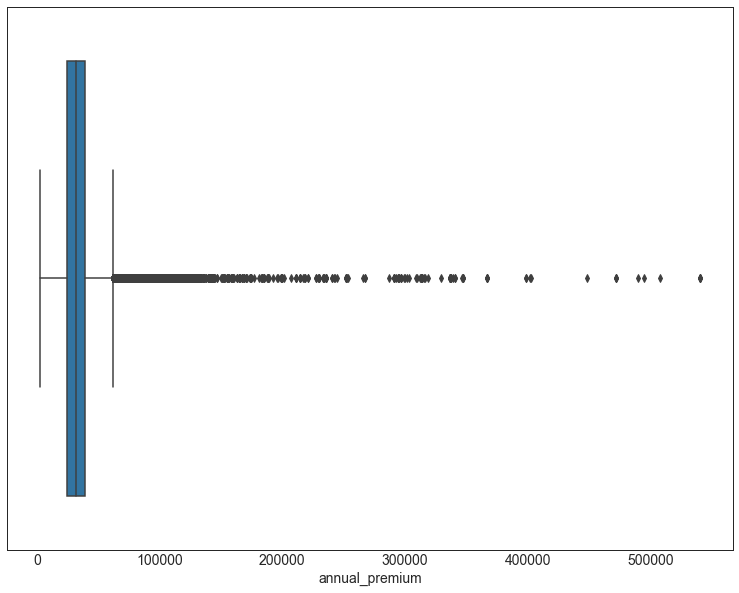

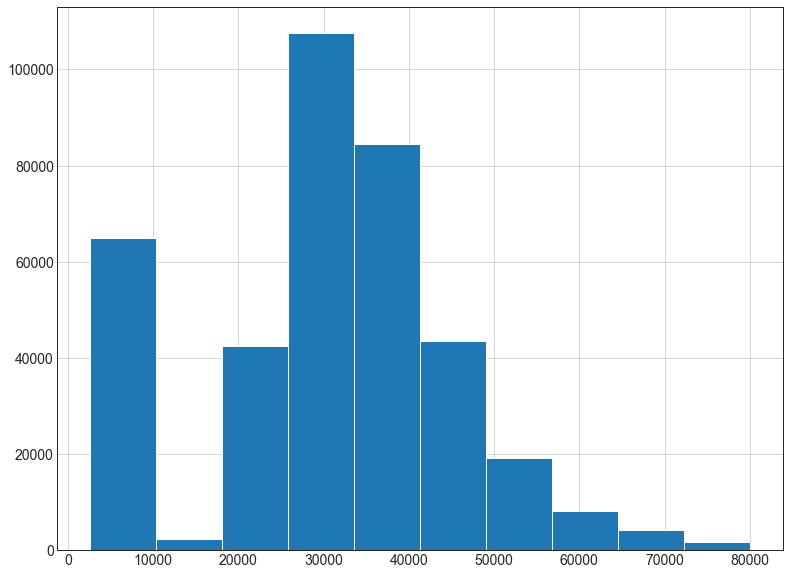

In [41]:
sns.boxplot(
    x = 'annual_premium',
    data = train
)
plt.show()
train[train.annual_premium <= 80000].annual_premium.hist()
plt.show()

In [42]:
train = train[train.annual_premium <= 80000]

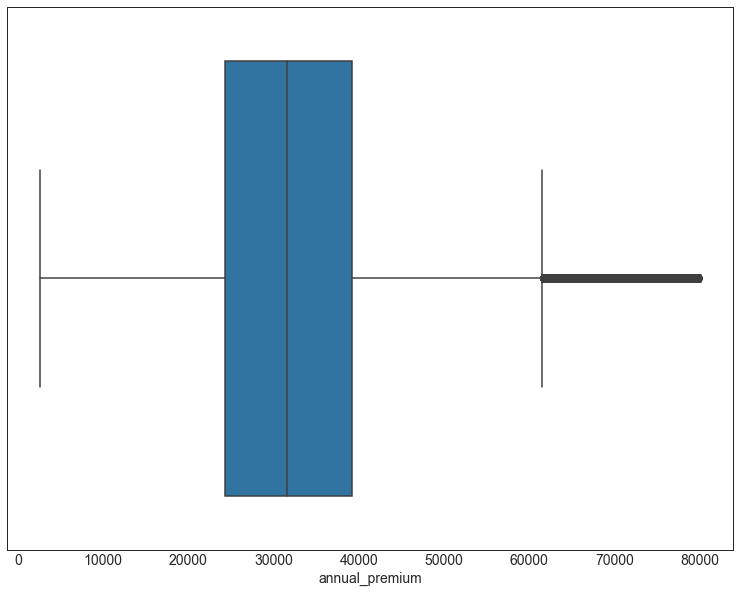

In [43]:
sns.boxplot(
    x = 'annual_premium',
    data = train
)

In [44]:
train.shape

(378744, 10)

## Encoding features

In [45]:
x = train 

In [46]:
def encoder(x):
    if  x == 'Male' or x == 'No' or x == '< 1 Year':
        return int(0)
    elif x == 'Female' or x == 'Yes' or x == '1-2 Year':
        return int(1)
    else:
        return int(2)

In [52]:
train.policy_sales_channel = train.policy_sales_channel.apply(lambda x: int(x))

In [47]:
train.gender = x.gender.apply(encoder)
train.vehicle_age = x.vehicle_age.apply(encoder)
train.vehicle_damage = x.vehicle_damage.apply(encoder)

In [48]:
train.head()

,gender,age,driving_license,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,0,44,1,0,2,1,40454.0,26.0,217,1
1,0,76,1,0,1,0,33536.0,26.0,183,0
2,0,47,1,0,2,1,38294.0,26.0,27,1
3,0,21,1,1,0,0,28619.0,152.0,203,0
4,1,29,1,1,0,0,27496.0,152.0,39,0


## Feature Scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train['annual_premium'] = scaler.fit_transform(train.annual_premium.to_frame())

In [53]:
train.head()

,gender,age,driving_license,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,0,44,1,0,2,1,0.488947,26,217,1
1,0,76,1,0,1,0,0.399519,26,183,0
2,0,47,1,0,2,1,0.461025,26,27,1
3,0,21,1,1,0,0,0.335957,152,203,0
4,1,29,1,1,0,0,0.321441,152,39,0
